# Data Dive 3: Cleaning Data
### Making Sense of NYC Restaurant Inspection Data

[This dataset](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) provides restaurant inspections, violations, grades and adjudication information. It is freely available through the NYC Open Data portal, though for the purposes of this exercise we'll be using a static version I pulled over the weekend (September 2019) that is available at the url below. A Data Dictionary is available [here](https://data.cityofnewyork.us/api/views/43nn-pn8j/files/e3160d37-1b15-41ef-af6b-a830ed39cbc0?download=true&filename=Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx). 

Throughout this exercise, we'll be drawing on skills highlighted in the [DataCamp course](https://www.datacamp.com/courses/cleaning-data-in-python), as well as miscellaneous other commands I've introduced in the first two classes. [Ten Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) is a great reference for these. 


`https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20180911.csv`.  



In [1]:
import pandas as pd
import requests

%matplotlib inline

## Part 1: Load and Inspect
1. Load data from DataFrame
2. Find the number of rows and columns in the data
3. List the columns in the DataFrame
4. Display the first twenty rows


Load data from DataFrame

In [2]:
df = pd.read_csv('https://grantmlong.com/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20190914.csv')

Find the number of rows and columns in the data

In [3]:
df.shape

(390656, 26)

List the columns in the DataFrame

In [4]:
list(df)

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract',
 'BIN',
 'BBL',
 'NTA']

Display the first twenty rows

In [5]:
df.head(20)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41478979,SUBWAY,Manhattan,666,5 AVENUE,10103.0,2122472800,Sandwiches,08/22/2018,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.760542,-73.976421,105.0,4.0,10400.0,1034520.0,1.012688e+09,MN17
1,50051864,BUTCHER'S CUT,Queens,14613,NORTHERN BLVD,11354.0,7184604455,Korean,04/26/2018,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.765026,-73.820377,407.0,20.0,116300.0,4113214.0,4.050040e+09,QN51
2,41164840,LA TRAVIATA PIZZA,Manhattan,101,WEST 68 STREET,10023.0,2127211101,Pizza,08/14/2019,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.774942,-73.980861,107.0,6.0,15300.0,1028939.0,1.011400e+09,MN14
3,50062648,TGI FRIDAY,Brooklyn,3181,HARKNESS AVE,11235.0,7186480891,American,05/24/2017,Establishment re-opened by DOHMH,...,09/14/2019,Pre-permit (Operational) / Reopening Inspection,40.586561,-73.929106,315.0,48.0,62800.0,3248659.0,3.088410e+09,BK17
4,41629699,BLUE SMOKE,Manhattan,255,VESEY STREET,10282.0,2128892005,Barbecue,01/22/2019,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.714544,-74.015684,101.0,1.0,31703.0,1085867.0,1.000168e+09,MN25
5,40366109,FIFTH AVENUE BINGO,Brooklyn,416,5 AVENUE,11215.0,7187881691,American,03/23/2019,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.670038,-73.985591,306.0,39.0,13700.0,3324059.0,3.009980e+09,BK37
6,50010414,RED MANGO,Staten Island,2655,RICHMOND AVE,10314.0,7184947900,"Ice Cream, Gelato, Yogurt, Ices",07/27/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.582297,-74.169053,502.0,51.0,27702.0,5039658.0,5.024000e+09,SI24
7,41143058,THE ROOSEVELT HOTEL,Manhattan,45,EAST 45 STREET,10017.0,2128856076,American,07/03/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.754531,-73.977398,105.0,4.0,9400.0,1035393.0,1.012810e+09,MN17
8,50079051,LATINO COFFEE SHOP & PIZZA,Queens,15019,LIBERTY AVE,11433.0,7188802591,"Latin (Cuban, Dominican, Puerto Rican, South &...",06/07/2019,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.698026,-73.802008,412.0,27.0,20800.0,4215645.0,4.101070e+09,QN61
9,41230536,TORRES ITALIAN RESTURANT,Brooklyn,6808,BAY PARKWAY,11204.0,7182561140,Pizza/Italian,03/05/2018,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.611892,-73.983465,311.0,47.0,25800.0,3135135.0,3.055800e+09,BK28


## Part 2: Explore and Summarize
1. Count the number of unique restaurants in the DataFrame.
2. Calculate the share of critical inpections.
3. Show a histogram of `SCORE`. 
4. Create a boxplot of `GRADE` against `SCORE`. 
5. Describe the `INSPECTION DATE` field. 
6. Count the number of null values for `VIOLATION DESCRIPTION`. 
7. Print twenty unique non-null values for `VIOLATION DESCRIPTION`. 


Count the number of unique restaurants in the DataFrame.

In [6]:
df['CAMIS'].nunique()

26874

Calculate the share of critical inpections.

In [7]:
(df['CRITICAL FLAG']=='Y').sum()/len(df)

0.5472717685124509

Show a histogram of `SCORE`. 

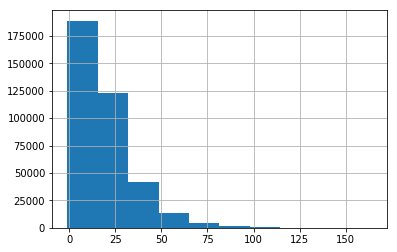

In [8]:
df['SCORE'].hist()

Create a boxplot of `GRADE` against `SCORE`. 

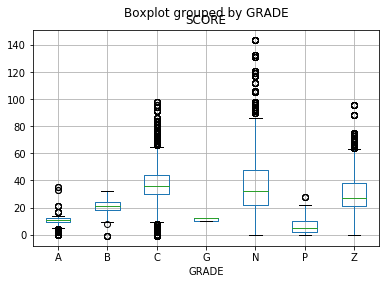

In [9]:
df.boxplot(column='SCORE', by='GRADE')

Describe the `INSPECTION DATE` field. 

In [10]:
df['INSPECTION DATE'].describe()

count         390656
unique          1306
top       01/01/1900
freq            1276
Name: INSPECTION DATE, dtype: object

Count the number of null values for VIOLATION DESCRIPTION.

In [11]:
df['VIOLATION DESCRIPTION'].isnull().sum()

8838

Print twenty unique violation descriptions.

In [12]:
df['VIOLATION DESCRIPTION'].unique()[:20]

array(['Wiping cloths soiled or not stored in sanitizing solution.',
       'Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.',
       'Food not cooled by an approved method whereby the internal product temperature is reduced from 140º F to 70º F or less within 2 hours, and from 70º F to 41º F or less within 4 additional hours.',
       'Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.',
       'Food contact surface not properly maintained.',
       "Evidence of mice or live mice present in facility's food and/or non-food areas.",
       'Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.',
     

## Part 3: Create Clean Variables
1. Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.
2. Create a `inspection_year` variable with the year of the `INSPECTION DATE`.
4. Drop observations with `inspection_year` before 2014. 
5. Drop observations with null values for `VIOLATION DESCRIPTION`. 
6. Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.
7. Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.
8. Create a `bad_temp` variable for any `VIOLATION DESCRIPTION` containing *temperature* or *Âº F*.


Transform `INSPECTION DATE` to datetime in new variable `inspection_datetime`.

In [13]:
df['inspection_datetime'] = pd.to_datetime(df['INSPECTION DATE'])

Create an `inspection_year` variable with the year of the `INSPECTION DATE`.


In [14]:
df['inspection_year'] = df['inspection_datetime'].dt.year

Drop observations with `inspection_year` before 2014. 

In [15]:
df = df.loc[df['inspection_year']>=2014]

Drop observations with null values for `VIOLATION DESCRIPTION`.

In [16]:
df = df.dropna(subset=['VIOLATION DESCRIPTION'])

Create a `found_vermin` variable for any `VIOLATION DESCRIPTION` containing *vermin*, *mouse*, *mice*, or *rat*.


In [17]:
df['found_vermin'] = df['VIOLATION DESCRIPTION'].str.contains(
    '(vermin)|(mouse)|(mice)|(rat)'
)

/Users/grantl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Create a `found_bugs` variable for any `VIOLATION DESCRIPTION` containing *insect*, *roach*, or *flies*.

In [18]:
df['found_bugs'] = df['VIOLATION DESCRIPTION'].str.contains(
    '(insect)|(roach)|(flies)'
)

/Users/grantl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


## Part 4: Create a Working Subset

1. Create a working subset DataFrame called `rest_df` with data grouped by restaurant (`'CAMIS'`) - take the max value for the following fields: `'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.
2. Create another working subset DataFrame called `violation_df` with data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.
3. Merge `rest_df` with `violation_df` to create `new_df`.
4. Show the top 20 value_counts for `CUISINE DESCRIPTION`.
5. Use the `cuisine_dict` to create a `cuisine_new` column with the `CUISINE DESCRIPTION`
6. Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

Create a working subset DataFrame called `rest_df` with data grouped by restaurant - take the max value for the following fields: `'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'inspection_datetime',` and `'inspection_year'`.


In [19]:
rest_df = df[[
    'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 
    'CUISINE DESCRIPTION', 'inspection_datetime', 'inspection_year'
]].groupby('CAMIS').max()

Create another working subset DataFrame called `violation_df` with the data grouped by restaurant - take the sum value for `'found_vermin'` and `'found_bugs'`.


In [20]:
violation_df = df[['CAMIS', 'found_vermin', 'found_bugs']].groupby('CAMIS').sum()

Join `rest_df` with `violation_df` to create `new_df`.


In [21]:
new_df = rest_df.join(violation_df)

Show the top 20 value_counts for `CUISINE DESCRIPTION` from `rest_df`.

In [22]:
rest_df['CUISINE DESCRIPTION'].value_counts().head(20)

American                                                            5751
Chinese                                                             2389
Café/Coffee/Tea                                                     1792
Pizza                                                               1215
Italian                                                              964
Mexican                                                              952
Japanese                                                             869
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     831
Bakery                                                               749
Caribbean                                                            704
Spanish                                                              636
Donuts                                                               525
Chicken                                                              510
Pizza/Italian                                      

Replace the `CUISINE DESCRIPTION` for `CafÃ©/Coffee/Tea` with `Coffee`.

In [23]:
rest_df.loc[rest_df['CUISINE DESCRIPTION']=='Café/Coffee/Tea', 'CUISINE DESCRIPTION'] = 'Coffee'

## Data Exploration

Working with those around you, dig through the data and find a tweet-worthy takeaway from the data. How does your favorite neighborhood or favorite cuisine stack up?

In [24]:
(
    new_df[
        ['CUISINE DESCRIPTION', 'found_vermin']
    ]
    .groupby('CUISINE DESCRIPTION')
    .mean()
    .sort_values(by='found_vermin')
    .head(20)
)

,found_vermin
CUISINE DESCRIPTION,
Basque,1.000000
Nuts/Confectionary,2.166667
Hotdogs,2.444444
Other,2.753846
Soups,2.888889
Hotdogs/Pretzels,3.233333
Donuts,3.462857
"Ice Cream, Gelato, Yogurt, Ices",3.763848
Café/Coffee/Tea,4.231027


## Bonus Round: Using Outside Resources to Clean Data

Oftentimes, external services - or even services from other teams within your own company - will exist to help process data. One handy example case we can use here is the [NYC Geoclient](https://api.cityofnewyork.us/geoclient/v1/doc), a REST api that returns location information for an arbitrary address in New York City. It's an awesome resource!

For the purposes of this exercise, I've included an API id below and gave you the key in class, but you can sign up for your own key at the [NYC Developer Portal](https://developer.cityofnewyork.us/).


In [ ]:
url = 'https://api.cityofnewyork.us/geoclient/v1/address.json'

params = {
    'houseNumber' : '1605',
    'street' : 'Amsterdam Avenue',
    'borough' : 'Manhattan',
    'zip' : '10031',    
    'app_id' : '902d6887',
    'app_key' : '590bf3976923555eea80031f6a37481c',   
}

raw_response = requests.get(url, params)

raw_response.json()


#### Applying this to our restaurant inspection data set. 

We can use this to find the exact location for each coffee shop in our data set. 

1. First, create a function to return the latitude and longitude for a given building number, street address, borough, and zip code. 
2. Next, create a new subset of data for a single cuisine. 
3. Apply the function from Step 1 to the df from Step 2.


In [ ]:
pd.set_option('mode.chained_assignment', None)

def get_coordinates(row):

    url = 'https://api.cityofnewyork.us/geoclient/v1/address.json'

    params = {
        'houseNumber' : row['BUILDING'],
        'street' : row['STREET'],
        'borough' : row['BORO'],
        'zip' : row['ZIPCODE'],    
        'app_id' : 'XXX',
        'app_key' : 'XXX',   
    }

    raw_response = requests.get(url, params)
    
    try: 
        lat = raw_response.json()['address']['latitude']
        long = raw_response.json()['address']['longitude']
        value = str(lat) + ',' + str(long)
    except KeyError:
        value = None
    
    return value


In [ ]:
cuisine_df = new_df.loc[new_df['CUISINE DESCRIPTION']=='Ice Cream, Gelato, Yogurt, Ices', ]

In [ ]:
cuisine_df['coordinates'] = cuisine_df.apply(get_coordinates, axis=1)

In [ ]:
cuisine_df['latitude'] = cuisine_df.coordinates.str.split(',').str.get(0).astype(float)
cuisine_df['longitude'] = cuisine_df.coordinates.str.split(',').str.get(1).astype(float)


In [ ]:
cuisine_df.plot.scatter('latitude', 'longitude')